# grid search

- Cartesian product of hyperparameter sets.
- Curse of dimensionality as the number of function evaluations increases exponentially with the dimension of configuration space.

# Random Search

- sampling configuration at random and performing exhaustive search until a certain budget is reached.
- useful since some parameters are more important than others
- easier parallelization and flexible resource allocation

# Bayesian Optimization
1- Essentially is a sequential model-based apprach.
## Process:
1- We describe a propr belief over the possible objective function.
2- sequentially refine this model as data are observed vias Bayesian posterior updating.
3- The Bayesian posterior represents our updated beleifs.
## Benefits
1- Data efficinet when computing $f$, objective function for a specific problem such as accuracy of predictions for object recognition system, is costly, we do not have access to gradeint in respect to $x$, model parameters such as num_layers, and where $f$ is non-convex and multimidal.


# Bayesian Optimization

- An iterative algorithm with two key ingredients:
 - probabilistic surrogate model
 - acquisition function to decide which point to evaluate next
 - In each iteration the surrogate model is fitted to all observations of the target function made so far. The acquisition function then determines the utility of the multiple candidate points, trading off exploration and exploitation. Often expected improvement is used

$$\large
\mathbb{E}[\mathbb{I}(\lambda)] = \mathbb{E}[max(f_{min}-Y, 0)]
$$

# Surrogage Modeles
- Employes Gaussian Process
- A Gaussian process $\large \mathcal {G}(\mu(\lambda), \mathcal{k}(\lambda, \lambda^\prime))$ is fully specified by a mean $\large \mu(\lambda)$ and a covariance function $\large \mathcal{k}(\lambda, \lambda^\prime)$ 
- The mean funtion is usually constant in Bayesian optimization
- The quality of the Gaussian process is solely dependent on the quality of the covariant function
- A common choice is the Matren 5/2 kernel, with its hyperparameters integrated out by Markov Chain Monte Carlo.

# Limitations
- Gaussian process scales cubically with the number of data points, thus limiting applicability.
  - Cubic scaling can be avoided using scalable Gaussian approzimations suchas sparse Gaussian process. 
- Another downside with standard kernel is poor scalability to high dimensions. Extentions to address the issue include:
  - random embedding
  - GP on partitions of configuration space
  - cylindric kernels
  - additive kernels

![](img/surrogatemode.png)

# Bayesian Optimization
- Efficient in terms of the required number of the functions to be evaluated
  - Allowing prior belief to influence sampling
  - trade off exploration and explotation of the searh space
- Prior represents our beliefs about the space of possible objective function
- posterior captures our updated beleifs about the unknown objective function.
  - Example: We are given a box of balls of various colours. We can have a prior beleif that they are mostly red as we know a few parameters about the the box. Then as we smalpe and observe we update our belief. (turn that interactive)
- To sample efficinetly, Bayesian optimization uses an acquiition function to determine the next point to sample.
  - The decision represnts an automatic trade-off between exploration and explotation.
  
  
## Benefits
- minimizes the number of functions to evaluation
- It is likely to do well even in settings wjere the objective function has multiple local maxima.


# Process pronciples
- Informative priors can describe attributes of the objective function such as where the maximum likelihook of a maxima is even when the objective function is not known.
- Optimization follows the principle of maximum expected utility

# Gaissian Process
- A GP is an extention of the multivariate Gaussian distributoin to an infinite dimention stochastic process for which any finiate combinatino of dimentions will be a Gaussian distribution.
- A Gaissian distrinution is completely specified by its mean, $\mu$ and covariance, $\sigma^2$
- A Gaussian process is distribution over **functions**, completely specified by its mean function, $m$ and convariance function $k$.
$$\large
f(x) \sim \mathcal{GP} (m(x), k(x,x'))
$$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
import mxnet as mx

In [4]:
x = np.arange(-5, 5, .1)
def f(x):
    return np.cos(x)
y = f(x)

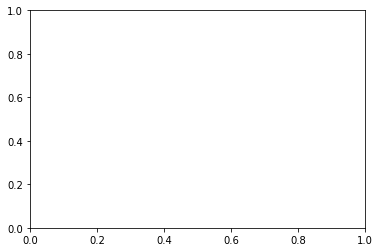

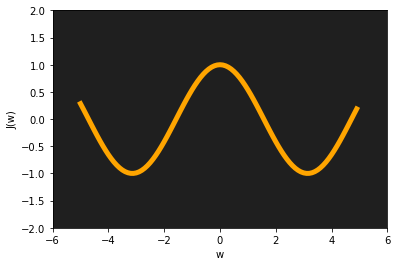

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_facecolor('#1F1F1F')
ax.set_xlabel('w')
ax.set_ylabel('J(w)')
ax.set_xlim(-6, 6)
ax.set_ylim(-2, 2)
ax.plot(x, y, color='orange', linewidth=5, markersize=12)

In [6]:
mx.initializer.Orthogonal()

In [7]:
before = nd.ones(shape=(7))
before

NameError: name 'nd' is not defined

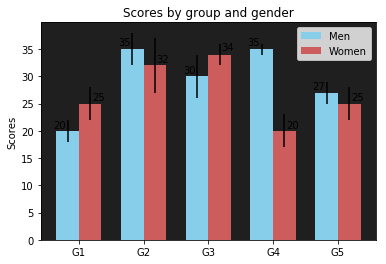

In [8]:
import numpy as np
import matplotlib.pyplot as plt

men_means, men_std = (20, 35, 30, 35, 27), (2, 3, 4, 1, 2)
women_means, women_std = (25, 32, 34, 20, 25), (3, 5, 2, 3, 3)

ind = np.arange(len(men_means))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
ax.set_facecolor('#1F1F1F')
rects1 = ax.bar(ind - width/2, men_means, width, yerr=men_std,
                color='SkyBlue', label='Men')
rects2 = ax.bar(ind + width/2, women_means, width, yerr=women_std,
                color='IndianRed', label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))
ax.legend()


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')


autolabel(rects1, "left")
autolabel(rects2, "right")

plt.show()


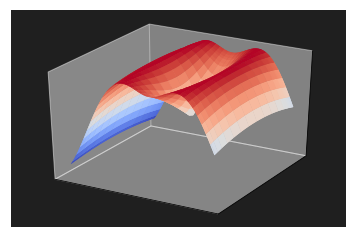

In [63]:
'''
======================
3D surface (color map)
======================

Demonstrates plotting a 3D surface colored with the coolwarm color map.
The surface is made opaque by using antialiased=False.

Also demonstrates using the LinearLocator and custom formatting for the
z axis tick labels.
'''

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_facecolor('#1F1F1F')

# Make data.
X = np.arange(-1, 1, 0.25)
Y = np.arange(-5, 5, 0.25)
x = np.arange(-3, 4, .1)
X=x
Y = f(X)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)#,
                      # linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.zaxis.set_ticks([])

ax.view_init(30, 120)

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [11]:
Y

array([[ 0.28366219,  0.28366219,  0.28366219,  0.28366219,  0.28366219,
         0.28366219,  0.28366219,  0.28366219],
       [ 0.18651237,  0.18651237,  0.18651237,  0.18651237,  0.18651237,
         0.18651237,  0.18651237,  0.18651237],
       [ 0.08749898,  0.08749898,  0.08749898,  0.08749898,  0.08749898,
         0.08749898,  0.08749898,  0.08749898],
       [-0.01238866, -0.01238866, -0.01238866, -0.01238866, -0.01238866,
        -0.01238866, -0.01238866, -0.01238866],
       [-0.11215253, -0.11215253, -0.11215253, -0.11215253, -0.11215253,
        -0.11215253, -0.11215253, -0.11215253],
       [-0.2107958 , -0.2107958 , -0.2107958 , -0.2107958 , -0.2107958 ,
        -0.2107958 , -0.2107958 , -0.2107958 ],
       [-0.30733287, -0.30733287, -0.30733287, -0.30733287, -0.30733287,
        -0.30733287, -0.30733287, -0.30733287],
       [-0.40079917, -0.40079917, -0.40079917, -0.40079917, -0.40079917,
        -0.40079917, -0.40079917, -0.40079917],
       [-0.49026082, -0.49026082

In [1]:
import numpy as np
from mxnet import nd
import matplotlib.pyplot as plt


In [2]:
x = nd.random_normal(loc=0, scale=1, shape=(100))

In [18]:
y_sig = nd.sigmoid(x).asnumpy()
y_tanh = nd.tanh(x)
y_softmax = nd.softmax(x)
y_relu = nd.relu(x)
x = x.asnumpy()


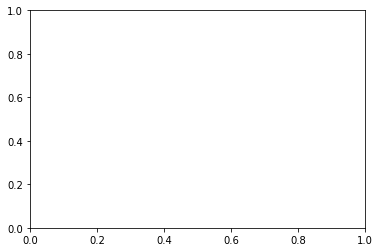

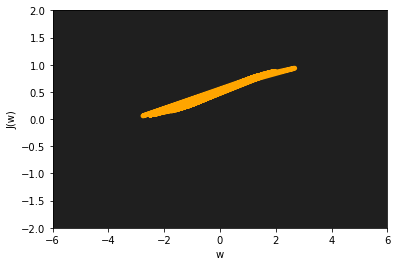

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_facecolor('#1F1F1F')
ax.set_xlabel('w')
ax.set_ylabel('J(w)')
ax.set_xlim(-6, 6)
ax.set_ylim(-2, 2)
ax.plot(x, y_sig, color='orange', linewidth=5, markersize=12)

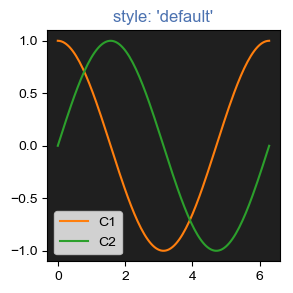

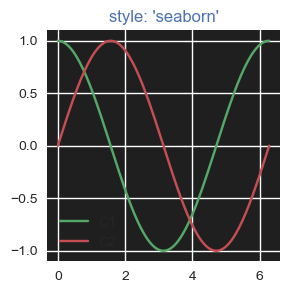

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
th = np.linspace(0, 2*np.pi, 128)

def demo(sty):
    mpl.style.use(sty)
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.set_facecolor('#1F1F1F')

    ax.set_title('style: {!r}'.format(sty), color='C0')

    ax.plot(th, np.cos(th), 'C1', label='C1')
    ax.plot(th, np.sin(th), 'C2', label='C2')
    ax.legend()

demo('default')
demo('seaborn')

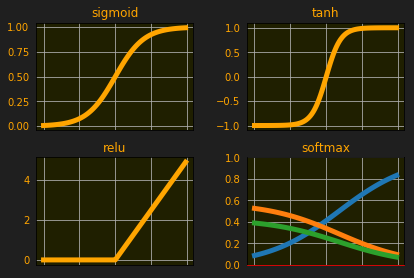

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from mxnet import nd

from matplotlib.ticker import NullFormatter  # useful for `logit` scale

# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the interval ]0, 1[
#y = np.random.normal(loc=0.5, scale=0.4, size=1000)
#y = y[(y > 0) & (y < 1)]
#y.sort()

x = nd.arange(-5, 5, .1)




# plot with various axes scales
fig = plt.figure(1, facecolor='#1F1F1F')
# Sigmoid
y = nd.sigmoid(x)

ax = fig.add_subplot(221, facecolor='#1F1F00')

#ax.tick_params(axis='x', colors='orange')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax.tick_params(axis='y', labelcolor='orange', left=False)

plt.plot(x.asnumpy(), y.asnumpy(), color='orange', linewidth=5)
plt.yscale('linear')
plt.title('sigmoid', color='orange')
plt.grid(True)


# tanh
y = nd.tanh(x)
ax = fig.add_subplot(222, facecolor='#1F1F00')
#ax.tick_params(axis='x', colors='orange')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax.tick_params(axis='y', labelcolor='orange', left=False)
plt.plot(x.asnumpy(), y.asnumpy(), color = 'orange', linewidth=5)
plt.yscale('linear')
plt.title('tanh', color='orange')
plt.grid(True)


# relu
y = nd.relu(x)
ax = fig.add_subplot(223, facecolor='#1F1F00')
#ax.tick_params(axis='x', colors='orange')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax.tick_params(axis='y', labelcolor='orange', left=False)
plt.plot(x.asnumpy(), y.asnumpy(), color='orange', linewidth=5)
plt.yscale('linear')
plt.title('relu', color='orange')
plt.grid(True)

# softmax
x = np.arange(-2.0, 6.0, 0.1)
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    exp_x = np.exp(x)
    return exp_x / exp_x.sum(axis=0)

scores = np.vstack([.5*x, .8* np.ones_like(x), 0.5 * np.ones_like(x)])

y=softmax(scores)
ax = fig.add_subplot(224, facecolor='#1F1F00')
#ax.tick_params(axis='x', colors='orange')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax.tick_params(axis='y', labelcolor='orange', left=False)
ax.spines['bottom'].set_color('red')
plt.plot(x, y.T, linewidth=5, )
plt.yscale('linear')
plt.title('softmax', color='orange')
plt.ylim(ymin=0, ymax=1)
plt.grid(True)
# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()

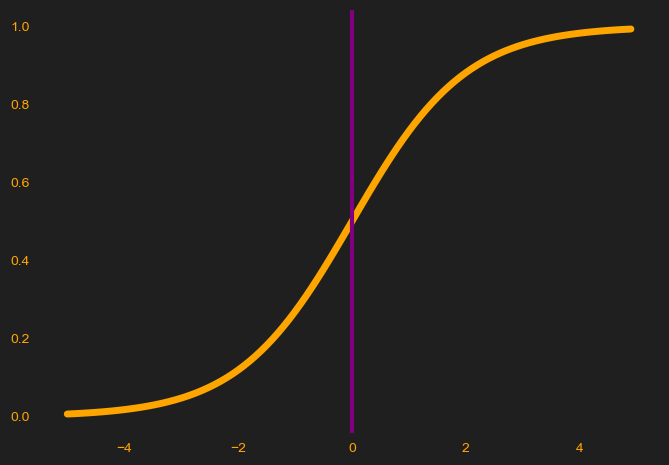

-0.049999908

In [181]:
x = nd.arange(-5,5, .1)
y = nd.sigmoid(x)
fig = plt.figure(1, facecolor='#1F1F1F')
plt.subplot(111, facecolor='#1F1F1F')
plt.plot(x.asnumpy(),y.asnumpy(), color="orange", linewidth=5 )
plt.tick_params(axis='x', colors='orange')
plt.tick_params(axis='y', colors='orange')
plt.axvline(x=0, linewidth=3, color='purple')

plt.grid(False)
plt.show()
x.mean().asscalar()

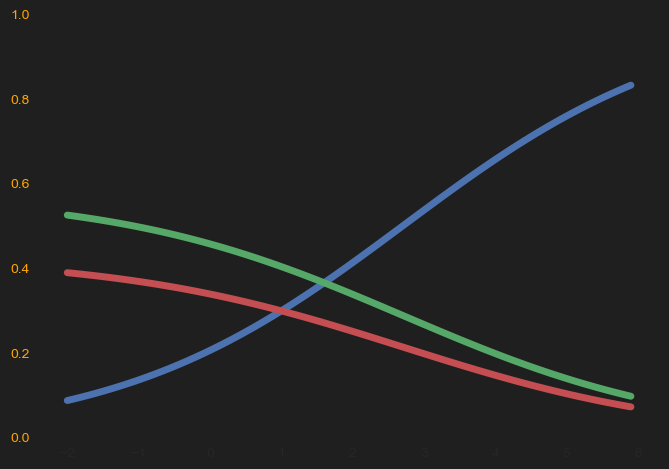

In [216]:
x = np.arange(-2.0, 6.0, 0.1)
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    exp_x = np.exp(x)
    return exp_x / exp_x.sum(axis=0)

scores = np.vstack([.5*x, .8* np.ones_like(x), 0.5 * np.ones_like(x)])

y=softmax(scores)
fig = plt.figure(1, facecolor='#1F1F1F')

plt.subplot(111, facecolor='#1F1F1F')
plt.plot(x,y.T, linewidth=5 )
#plt.tick_params(axis='x', colors='orange')
plt.tick_params(axis='y', colors='orange')
plt.ylim(ymin=0, ymax=1)

plt.grid(False)
plt.show()


In [250]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [251]:
def ackley_fun(x, a=20, b=0.2, c=2*np.pi):
    d = x.shape[0]
    s = sum(x**2)
    return(s)

print(ackley_fun(np.array([1,2,3])))

14


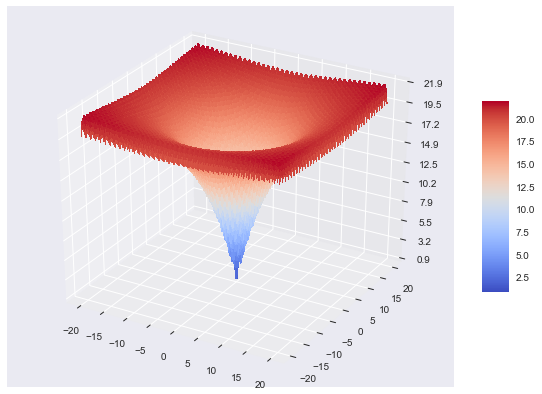

In [252]:
def ackley2d(x, y, a=20, b=0.2, c=2*np.pi):
    d = 2
    sum1 = x**2 + y**2
    sum2 = np.cos(c*x) + np.cos(c*y)
    term1 = -a * np.exp(-b*np.sqrt(sum1/d))
    term2 = -np.exp(sum2/d)
    s = term1 + term2 + a + np.exp(1)
    return(s)


fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')
x = np.linspace(-20, 20, 200)
y = x
X,Y = np.meshgrid(x, y)
Z = ackley2d(X, Y)

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm,
        linewidth=0, antialiased=False)

#ax.set_zlim(0, 0.2)

ax.zaxis.set_major_locator(plt.LinearLocator(10))
ax.zaxis.set_major_formatter(plt.FormatStrFormatter('%.01f'))

fig.colorbar(surf, shrink=0.5, aspect=7, cmap=plt.cm.coolwarm)

plt.show()

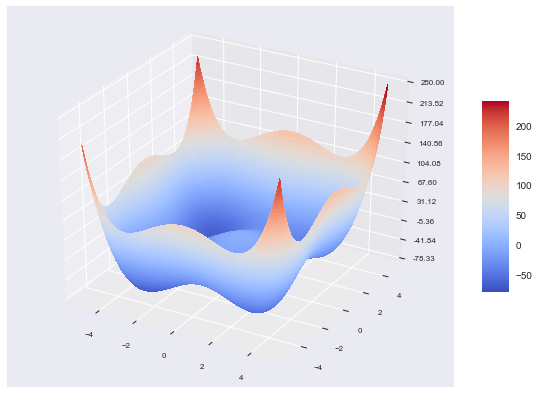

In [253]:
def styblinski(x, y):
    return(1.0/2 * (x**4 - 16*x**2 + 5*x + y**4 - 16*y**2 + 5*y))

fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')
x = np.linspace(-5, 5, 200)
y = x
X,Y = np.meshgrid(x, y)
Z = styblinski(X, Y)

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm,
        linewidth=0, antialiased=False)

#ax.set_zlim(0, 0.2)

ax.zaxis.set_major_locator(plt.LinearLocator(10))
ax.zaxis.set_major_formatter(plt.FormatStrFormatter('%.02f'))

plt.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(labelsize=8) 

fig.colorbar(surf, shrink=0.5, aspect=7, cmap=plt.cm.coolwarm)

plt.show()

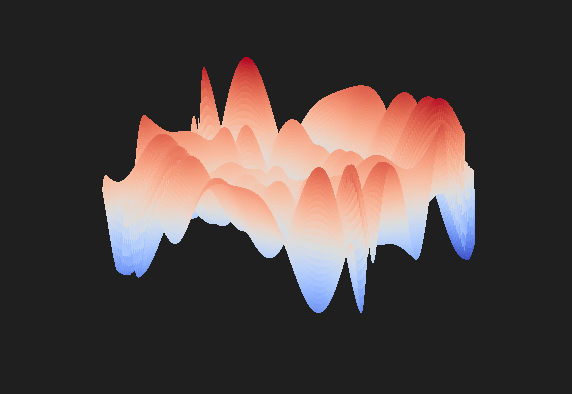

In [297]:
def eggholder(x, y):
    return(-(y + 47)*np.sin(np.sqrt(np.abs(y+x/2+47))) - x*np.sin(np.sqrt(np.abs(x - (y+47)))))

fig = plt.figure(figsize=(10, 7), facecolor='#1F1F1F')
ax = fig.gca(projection='3d', facecolor='#1F1F1F')
x = np.linspace(-256, 256, 200)
y = x
X,Y = np.meshgrid(x, y)
Z = eggholder(X, Y)

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap=plt.cm.coolwarm,
        linewidth=0, antialiased=False, facecolor='#1F1F1F')

#ax.set_zlim(0, 0.2)

ax.zaxis.set_major_locator(plt.LinearLocator(10))
ax.zaxis.set_major_formatter(plt.FormatStrFormatter('%.02f'))

plt.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(labelsize=8, color='orange') 
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.grid(False)
ax.w_xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.w_yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.w_zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.grid(True)

#fig.colorbar(surf, shrink=0.5, aspect=7, cmap=plt.cm.coolwarm)

plt.show()

In [300]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D


In [328]:
def func_z(x, y):
    # Calculate values of Z from the created grid
    z = .5*x**2/5. + .5*x*y/50. + .5*y**2/5.

    return z

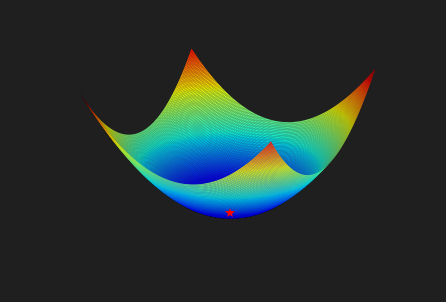

In [329]:
''' Plot our function '''
a = np.arange(-10, 10, 0.1)
b = np.arange(-10, 10, 0.1)

x, y = np.meshgrid(a, b)
z = func_z(x, y)

fig1 = plt.figure(facecolor='#1F1F1F')
ax1 = Axes3D(fig1)
ax1.set_facecolor('#1F1F1F')
surf = ax1.plot_surface(x, y, z, edgecolor='none', rstride=1,
                        cstride=1, cmap='jet', facecolor='#1F1F1F')

# Plot target (the minimum of the function)
min_point = np.array([0., 0.])
min_point_ = min_point[:, np.newaxis]
ax1.plot(*min_point_, func_z(*min_point_), 'r*', markersize=10)

ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])
ax1.grid(False)
ax1.w_xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax1.w_yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax1.w_zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax1.grid(True)

plt.show()

In [309]:
def gradient_descent(previous_x, previous_y, learning_rate, epoch):
    x_gd = []
    y_gd = []
    z_gd = []

    x_gd.append(previous_x)
    y_gd.append(previous_y)
    z_gd.append(func_z(previous_x, previous_y))

    # begin the loops to update x, y and z
    for i in range(epoch):
        current_x = previous_x - learning_rate*(2*previous_x/5. +
                                               previous_y/50.)
        x_gd.append(current_x)
        current_y = previous_y - learning_rate*(previous_x/50. +
                                                previous_y/5.)
        y_gd.append(current_y)

        z_gd.append(func_z(current_x, current_y))

        # update previous_x and previous_y
        previous_x = current_x
        previous_y = current_y

    return x_gd, y_gd, z_gd

In [310]:
x0 = -2
y0 = 2.5
learning_rate = 1.3
epoch = 10


In [311]:
x_gd, y_gd, z_gd = gradient_descent(x0, y0, learning_rate, epoch)


In [312]:
# Create animation
line, = ax1.plot([], [], [], 'r-', label = 'Gradient descent', lw = 1.5)
point, = ax1.plot([], [], [], 'bo')
display_value = ax1.text(2., 2., 27.5, '', transform=ax1.transAxes)

def init():
    line.set_data([], [])
    line.set_3d_properties([])
    point.set_data([], [])
    point.set_3d_properties([])
    display_value.set_text('')

    return line, point, display_value

def animate(i):
    # Animate line
    line.set_data(x_gd[:i], y_gd[:i])
    line.set_3d_properties(z_gd[:i])
    
    # Animate points
    point.set_data(x_gd[i], y_gd[i])
    point.set_3d_properties(z_gd[i])

    # Animate display value
    display_value.set_text('Min = ' + str(z_gd[i]))

    return line, point, display_value

ax1.legend(loc = 1)

anim = animation.FuncAnimation(fig1, animate, init_func=init,
                               frames=len(x_gd), interval=120, 
                               repeat_delay=60, blit=True)

plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def gradient_descent(previous_x, learning_rate, epoch):
    x_gd = []
    y_gd = []
    
    x_gd.append(previous_x)
    y_gd.append(func_y(previous_x))

    # begin the loops to update x and y
    for i in range(epoch):
        current_x = previous_x - learning_rate*(2*previous_x - 4)
        x_gd.append(current_x)
        y_gd.append(func_y(current_x))

        # update previous_x
        previous_x = current_x

    return x_gd, y_gd

In [4]:
# Initialize x0 and learning rate
x0 = -0.7
learning_rate = 0.15
epoch = 10

In [16]:
def func_y(x):
    y = x**2 - 4*x + 2

    return y

In [84]:
x = nd.arange(-5,5, .1)
y = nd.sigmoid(x)
fig = plt.figure(1, facecolor='#1F1F1F')
plt.subplot(111, facecolor='#1F1F1F')
plt.plot(x.asnumpy(),y.asnumpy(), color="orange", linewidth=5 )
plt.tick_params(axis='x', colors='orange')
plt.tick_params(axis='y', colors='orange')
plt.axvline(x=0, linewidth=3, color='purple')

plt.grid(False)
plt.show()
x.mean().asscalar()

NameError: name 'nd' is not defined

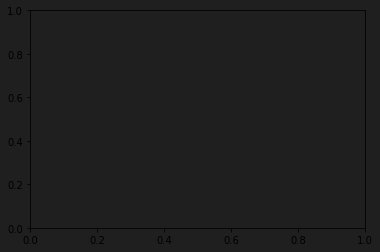

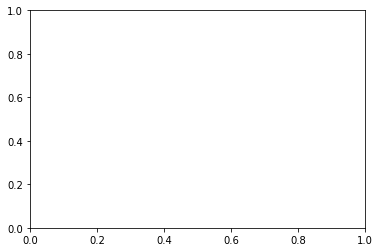

In [89]:
# y = x^2 - 4x + 2
x = np.arange(-1, 5, 0.01)
y = func_y(x)

fig = plt.figure(1, facecolor='#1F1F1F')
plt.subplot(111, facecolor='#1F1F1F')

fig.set_facecolor('#1F1F1F')
ax.set_facecolor('#1F1F1F')

ax.plot(x,y, linewidth=5, color='orange')
ax.scatter(x_gd, y_gd, c = 'yellow', marker='D', zorder=1 )
for i in range(1, epoch+1):
    ax.annotate('', xy=(x_gd[i], y_gd[i]), xytext=(x_gd[i-1], y_gd[i-1]),
                   arrowprops={'arrowstyle': '->', 'color': 'green', 'lw': 3},
                   va='center', ha='center')
ax.set_xticks([])
ax.set_yticks([])

plt.show()
plt.grid(False)

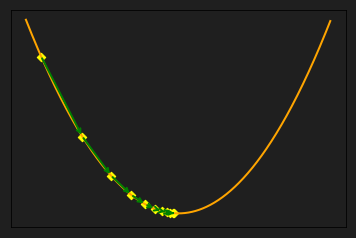

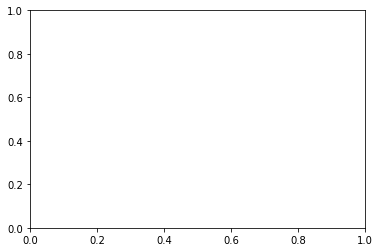

In [97]:
# y = x^2 - 4x + 2
x = np.arange(-1, 5, 0.01)
y = func_y(x)
fig, ax = plt.subplots()
fig.set_facecolor('#1F1F1F')
ax.set_facecolor('#1F1F1F')

ax.plot(x,y, linewidth=2, color='orange', zorder=-1)
ax.scatter(x_gd, y_gd, c = 'yellow', marker='D', zorder=-1)
for i in range(1, epoch+1):
    ax.annotate('', xy=(x_gd[i], y_gd[i]), xytext=(x_gd[i-1], y_gd[i-1]),
                   arrowprops={'arrowstyle': '->', 'color': 'green', 'lw': 2},
                   va='center', ha='center')
ax.set_xticks([])
ax.set_yticks([])

plt.show()
plt.grid(False)






In [160]:
from mxnet import gluon
gluon.loss.

ValueError: num must be 1 <= num <= 1, not 2

<Figure size 432x288 with 0 Axes>

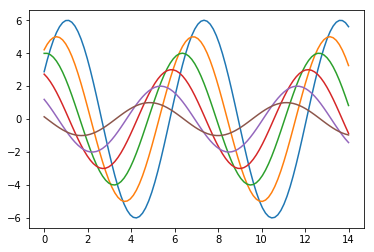

In [127]:
import random as rnd
import pandas as pd

range_start = 0
range_end = 49

In [154]:
rnd.seed(42)
noise_factor = lambda x: rnd.random()* 2 * x
np.random.seed(13)
d = np.random.normal(loc=range_start, scale=1, size=range_end + 1)
r = list(map(lambda x: 2 * x + 1 + rnd.random()* noise_factor(3), d))


In [155]:
sns.set_style("darkgrid", {"axes.facecolor": "0"})


/Users/cyrusmv/miniconda3/envs/mxnet_rl_with_graphics/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


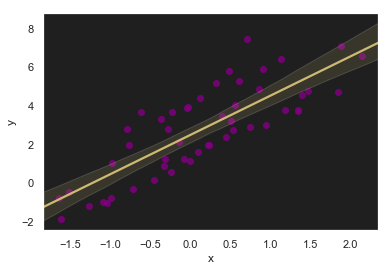

In [159]:
noisy_data = pd.DataFrame(np.column_stack((d, r)), columns=['x', 'y'])
sns.set()
sns.set_style({'axes.grid': False, 'grid.color': 'blue', 'facecolor': 'black'})

sns.set(color_codes=True)
ax = sns.regplot('x', 'y', data=noisy_data ,line_kws={'color': 'y'}, scatter_kws={'facecolor':'purple', 'color':'purple'}, color='black')
ax.set_facecolor('#1F1F1F')
ax.grid(False)
plt.show()